<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Valerie_Langat_(slightly_less_messy)_LS_DS_141_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
columns = ['Party', 'Handicapped_Infants', 'WaterProjectCostShare', 'BudgReso', 'PhysFeeFreeze', 'ElSalvAid', 'ReliGroupsinSchools',
         'AntiSatTestBan', 'NicaraguanContrasAid',
           'MxMissle', 'Immigration', 'SynfuelsCorpCutback', 'EdSpending', 'SuperfundRighttoSue', 'Crime', 'DutyFreeExports', 'ExportAdminActofSA']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=columns, na_values=['?'])

In [0]:
data.head()

,Party,Handicapped_Infants,WaterProjectCostShare,BudgReso,PhysFeeFreeze,ElSalvAid,ReliGroupsinSchools,AntiSatTestBan,NicaraguanContrasAid,MxMissle,Immigration,SynfuelsCorpCutback,EdSpending,SuperfundRighttoSue,Crime,DutyFreeExports,ExportAdminActofSA
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
data.replace({'n':0, 'y':1, np.NaN:.5}, inplace=True)

In [0]:
data.shape

(435, 17)

In [0]:
grouped = data.groupby('Party', axis='rows')

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
grouped.describe()

Handicapped_Infants                                              WaterProjectCostShare                                              BudgReso                                              PhysFeeFreeze                                              ElSalvAid                                              ReliGroupsinSchools                                              AntiSatTestBan                                              NicaraguanContrasAid                                              MxMissle                                              Immigration                                              SynfuelsCorpCutback                                              EdSpending                                              SuperfundRighttoSue                                               Crime                                              DutyFreeExports                                              ExportAdminActofSA                                             
                         count      mean       std  min  25%  50%  75%  max                 count      mean       std  min  25%  50%  75%  max    count      mean       std  min  25%  50%  75%  max         count      mean       std  min  25%  50%  75%  max     count      mean       std  min  25%  50%  75%  max               count      mean       std  min  25%  50%  75%  max          count      mean       std  min  25%  50%  75%  max                count      mean       std  min  25%  50%  75%  max    count      mean       std  min  25%  50%  75%  max       count      mean       std  min  25%  50%  75%  max               count      mean       std  min  25%  50%  75%  max      count      mean       std  min  25%  50%  75%  max               count      mean       std  min  25%  50%  75%  max  count      mean       std  min  25%  50%  75%  max           count      mean       std  min  25%  50%  75%  max              count      mean       std  min  25%  50%  75%  max
Party                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
democrat                 267.0  0.651685  0.543612  0.0  0.0  1.0  1.0  2.0                 267.0  0.659176  0.660329  0.0  0.0  1.0  1.0  2.0    267.0  0.917603  0.358502  0.0  1.0  1.0  1.0  2.0         267.0  0.112360  0.400325  0.0  0.0  0.0  0.0  2.0     267.0  0.295880  0.547123  0.0  0.0  0.0  0.5  2.0               267.0  0.528090  0.563753  0.0  0.0  0.0  1.0  2.0          267.0  0.808989  0.463958  0.0  1.0  1.0  1.0  2.0                267.0  0.846442  0.400677  0.0  1.0  1.0  1.0  2.0    267.0  0.846442  0.522804  0.0  1.0  1.0  1.0  2.0       267.0  0.494382  0.530079  0.0  0.0  0.0  1.0  2.0               267.0  0.573034  0.579492  0.0  0.0  1.0  1.0  2.0      267.0  0.269663  0.577082  0.0  0.0  0.0  0.0  2.0               267.0  0.385768  0.592135  0.0  0.0  0.0  1.0  2.0  267.0  0.411985  0.564227  0.0  0.0  0.0  1.0  2.0           267.0  0.719101  0.568379  0.0  0.0  1.0  1.0  2.0              267.0  1.262172  0.533283  0.0  1.0  1.0  2.0  2.0
republican               168.0  0.220238  0.456826  0.0  0.0  0.0  0.0  2.0                 168.0  0.684524

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

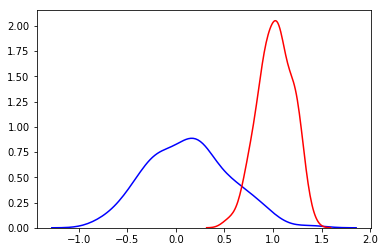

In [0]:
groupA = np.random.normal(0.112360, 0.400325, 267)
groupB = np.random.normal(1.005952, 0.172929, 168)

sns.kdeplot(groupA, color='b');
sns.kdeplot(groupB, color='r');

In [0]:
ttest_ind(groupA, groupB)

Ttest_indResult(statistic=-26.157572825262974, pvalue=3.689814913084358e-91)

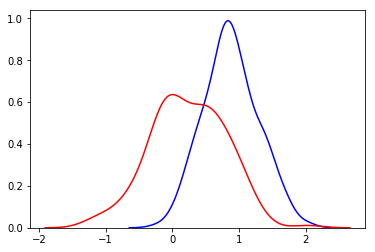

In [0]:
groupA = np.random.normal(0.846442,	0.400677, 267)
groupB = np.random.normal(0.273810, 0.575990, 168)

sns.kdeplot(groupA, color='b');
sns.kdeplot(groupB, color='r');

In [0]:
ttest_ind(groupA, groupB)

Ttest_indResult(statistic=13.83433326742465, pvalue=2.6398994190882598e-36)